In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (done) Feature 1: Import data from CSV


In [58]:
#with open('20042005-FCBarcelona.json', 'rb') as f:
#    data = f.readlines()

#normalized_data = pd.concat([pd.json_normalize(json.loads(j)) for j in data])
#normalized_data.head()

data = pd.read_csv("combined_data_laliga.csv")
data.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MÁLAGA,ATHLETIC,1-0,1-0,4.4,6.0,5.7,40,60,...,14.0,9.0,3.0,0.0,0.0,1,0,0,1,2014
1,1,SEVILLA FC,VALENCIA,1-1,1-0,4.7,6.5,6.8,47,53,...,16.0,8.0,2.0,0.0,1.0,1,1,1,1,2014
2,2,GRANADA,DEPORTIVO,2-1,0-1,4.6,7.2,5.9,53,47,...,14.0,26.0,3.0,0.0,0.0,2,1,1,2,2014
3,3,ALMERÍA,ESPANYOL,1-1,0-0,5.6,6.9,5.5,56,44,...,20.0,9.0,3.0,1.0,0.0,1,1,1,1,2014
4,4,EIBAR,REAL SOCIEDAD,1-0,1-0,3.7,6.5,5.9,41,59,...,20.0,14.0,1.0,0.0,0.0,1,0,0,1,2014


# Feature 2: Subset data (data cleaning)

In [9]:
analysis = data[["Home Team","Away Team", "Match Excitement", "Home Team Clearances", "Away Team Clearances"]]
analysis.head()

,Home Team,Away Team,Match Excitement,Home Team Clearances,Away Team Clearances
0,MÁLAGA,ATHLETIC,4.4,16.0,14.0
1,SEVILLA FC,VALENCIA,4.7,16.0,16.0
2,GRANADA,DEPORTIVO,4.6,21.0,14.0
3,ALMERÍA,ESPANYOL,5.6,25.0,20.0
4,EIBAR,REAL SOCIEDAD,3.7,17.0,20.0


# Feature 3: Analyze data with built-in functions

1) Make list of matches with 'Match Excitement' >= 5.0

2) len(match_excitement)

3) len(match_excitement)/total

4) Average "Home & Away team clearances"

5) home_clear/away_clear

In [38]:
exciting = analysis["Match Excitement"] > 5.0
exciting = sum(exciting)

not_exciting = analysis["Match Excitement"] <= 5.0
not_exciting = sum(not_exciting)

percent = (exciting)/(exciting+not_exciting)*100
print(str(format(percent,".2f")) + "%" + " of games are exciting")

51.24% of games are exciting


In [55]:

home_clear = np.average(analysis["Home Team Clearances"])
away_clear = np.average(analysis["Away Team Clearances"])

clear_ratio = home_clear/away_clear
print(str(format(clear_ratio,".2f"))  + " means away teams have better ball clearance/defense than home teams")

0.83 means away teams have better ball clearance/defense than home teams


# Feature 4: Plot two figures

1) bar plot: double bar plot of each teams home and away avg clearances

2) Scatter plot: Match excitement vs home/away ratings

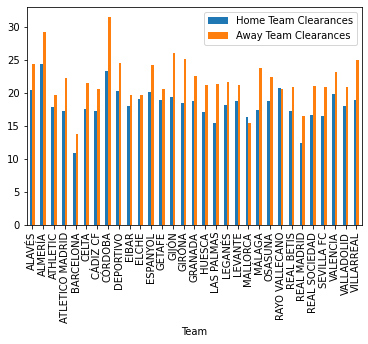

In [94]:
# Select just the team name and clearances
# Then rename so merging will work
home_clear_team = analysis[["Home Team","Home Team Clearances"]]
home_clear_team = home_clear_team.rename(columns={"Home Team" : "Team"})

# Select just the team name and clearances
# Then rename so merging will work
away_clear_team = analysis[["Away Team","Away Team Clearances"]]
away_clear_team = away_clear_team.rename(columns={"Away Team" : "Team"})

# Collapse team names and average
home_clear_team = home_clear_team.groupby(["Team"]).mean()
away_clear_team = away_clear_team.groupby(["Team"]).mean()

# Merge Home and Away team data
clean_team = home_clear_team.merge(away_clear_team, how='left', on='Team')

ax = clean_team.plot.bar(rot=90)

# (done) Feature 5: Jupyter notebook